In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter


In [2]:
df = pd.read_json('/mnt/2To/jupyter_data/data_viz/data/aggregated_parlamentarier_nested.json')

In [3]:
display(df)
print(f"We got {len(pd.unique(df['id']))} parlementary membres")


,anzeige_name,anzeige_name_de,anzeige_name_fr,name,name_de,name_fr,id,nachname,vorname,vorname_kurz,...,titel_de,titel_fr,parlamentarier_id,verguetungstransparenz_beurteilung_stichdatum,verguetungstransparenz_beurteilung,refreshed_date,in_kommission,parlamentarier_transparenz,interessenbindungen,zutrittsberechtigungen
0,"de Courten, Thomas","de Courten, Thomas","de Courten, Thomas",Thomas Jan de Courten,Thomas Jan de Courten,Thomas Jan de Courten,6,de Courten,Thomas,None,...,Nationalrat,Le Conseiller national,6,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'GPK-N', 'abkuerzung_fr': 'CdG...","[{'id': 52, 'parlamentarier_id': 6, 'stichdatu...","[{'anzeige_name': '383, de Courten, Thomas, Ko...","[{'id': 1387, 'anzeige_name': 'Schalch, Lucas'..."
1,"Hess, Lorenz","Hess, Lorenz","Hess, Lorenz",Lorenz Linus Hess,Lorenz Linus Hess,Lorenz Linus Hess,11,Hess,Lorenz,None,...,Nationalrat,Le Conseiller national,11,2020-12-31,nein,2024-03-18 02:31:28,"[{'abkuerzung': 'SGK-NR', 'abkuerzung_fr': 'CS...","[{'id': 121, 'parlamentarier_id': 11, 'stichda...","[{'anzeige_name': '73, Hess, Lorenz, GEWA, bei...","[{'id': 665, 'anzeige_name': 'Beutler, Nicole'..."
2,"Lohr, Christian","Lohr, Christian","Lohr, Christian",Christian Lohr,Christian Lohr,Christian Lohr,14,Lohr,Christian,None,...,Nationalrat,Le Conseiller national,14,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'SGK-NR', 'abkuerzung_fr': 'CS...","[{'id': 142, 'parlamentarier_id': 14, 'stichda...","[{'anzeige_name': '5599, Lohr, Christian, Comp...",[]
3,"Schneeberger, Daniela","Schneeberger, Daniela","Schneeberger, Daniela",Daniela Schneeberger,Daniela Schneeberger,Daniela Schneeberger,21,Schneeberger,Daniela,None,...,Nationalrätin,La Conseillère nationale,21,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'WAK-NR', 'abkuerzung_fr': 'CE...","[{'id': 211, 'parlamentarier_id': 21, 'stichda...","[{'anzeige_name': '7150, Schneeberger, Daniela...","[{'id': 627, 'anzeige_name': 'Jenni-Lincoln, V..."
4,"Aebischer, Matthias","Aebischer, Matthias","Aebischer, Matthias",Matthias Aebischer,Matthias Aebischer,Matthias Aebischer,40,Aebischer,Matthias,None,...,Nationalrat,Le Conseiller national,40,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'WBK-NR', 'abkuerzung_fr': 'CS...","[{'id': 4, 'parlamentarier_id': 40, 'stichdatu...","[{'anzeige_name': '13102, Aebischer, Matthias,...","[{'id': 63, 'anzeige_name': 'Bütikofer, Etienn..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,"Tuosto, Brenda","Tuosto, Brenda","Tuosto, Brenda",Brenda Tuosto,Brenda Tuosto,Brenda Tuosto,494,Tuosto,Brenda,None,...,Nationalrätin,La Conseillère nationale,494,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'KVF-NR', 'abkuerzung_fr': 'CT...",[],"[{'anzeige_name': '15517, Tuosto, Brenda, Asso...","[{'id': 1474, 'anzeige_name': 'De Vargas, Samu..."
242,"Vietze, Kristiane","Vietze, Kristiane","Vietze, Kristiane",Kristiane Vietze,Kristiane Vietze,Kristiane Vietze,495,Vietze,Kristiane,Kris,...,Nationalrätin,La Conseillère nationale,495,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'SGK-NR', 'abkuerzung_fr': 'CS...",[],"[{'anzeige_name': '15363, Vietze, Kristiane, I...","[{'id': 1475, 'anzeige_name': 'Jakovac, Andrej..."
243,"Vontobel, Erich","Vontobel, Erich","Vontobel, Erich",Erich Vontobel,Erich Vontobel,Erich Vontobel,496,Vontobel,Erich,None,...,Nationalrat,Le Conseiller national,496,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'APK-NR', 'abkuerzung_fr': 'CP...",[],"[{'anzeige_name': '15376, Vontobel, Erich, Hau...","[{'id': 1563, 'anzeige_name': 'Wobmann, Walter..."
244,"Wyssmann, Rémy","Wyssmann, Rémy","Wyssmann, Rémy",Rémy Wyssmann,Rémy Wyssmann,Rémy Wyssmann,497,Wyssmann,Rémy,None,...,Nationalrat,Le Conseiller national,497,None,None,2024-03-18 02:31:28,"[{'abkuerzung': 'SGK-NR', 'abkuerzung_fr': 'CS...",[],"[{'anzeige_name': '15284, Wyssmann, Rémy, Fach...","[{'id': 1480, 'anzeige_name': 'Wyssmann, Claud..."


We got 246 parlementary membres


In [4]:
df['partei_name_fr'].value_counts().values

array([68, 50, 44, 38, 24, 11,  2])

## Parlementaires

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

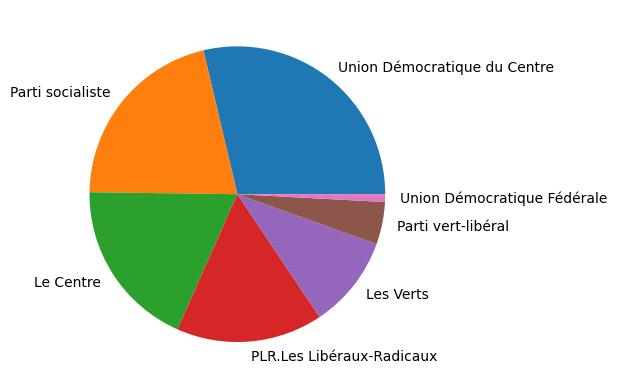

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure()
fig, ax = plt.subplots()
ax.pie(df['partei_name_fr'].value_counts().values, labels=df['partei_name_fr'].value_counts().index)
plt.figure()

In [6]:
df['interessenbindungen_count'] = df['interessenbindungen'].apply(lambda x : len(x))

<Axes: ylabel='interessenbindungen_count'>

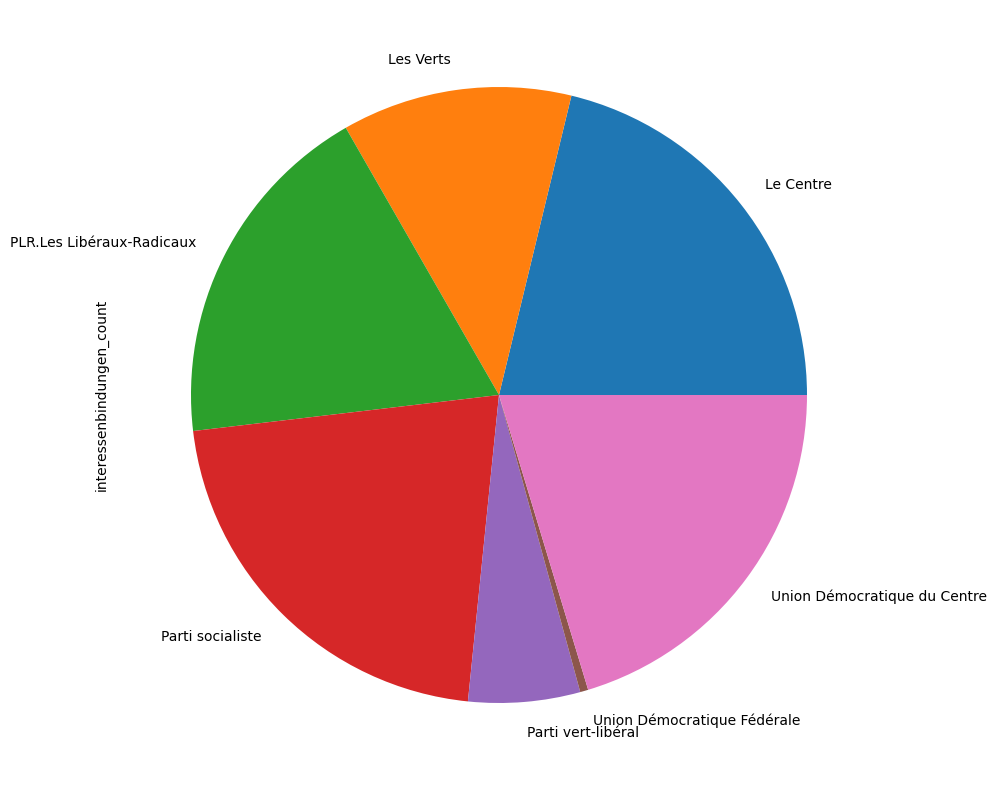

In [7]:
df.groupby('partei_name_fr').sum()['interessenbindungen_count'].plot.pie(y = 'mean', figsize=(10,10))

In [8]:
df.groupby('partei_name_fr').describe()['interessenbindungen_count']

,count,mean,std,min,25%,50%,75%,max
partei_name_fr,,,,,,,,
Le Centre,44.0,31.772727,17.018271,5.0,15.75,27.5,48.25,64.0
Les Verts,24.0,33.125000,15.593512,12.0,20.25,32.0,44.75,62.0
PLR.Les Libéraux-Radicaux,38.0,32.210526,18.540180,6.0,20.25,32.0,43.50,95.0
Parti socialiste,50.0,28.360000,24.620184,1.0,10.00,21.0,42.50,95.0
Parti vert-libéral,11.0,35.090909,19.755782,3.0,28.00,33.0,41.50,80.0
Union Démocratique Fédérale,2.0,14.000000,9.899495,7.0,10.50,14.0,17.50,21.0
Union Démocratique du Centre,68.0,19.691176,11.792051,4.0,10.00,17.0,28.25,52.0


In [10]:
Ehrenamtlich = ['Ehrenamtlich', 'Bezahlendes Mitglied', 'Ehrenamtlich', 'Ehrenamtlich', 'Ehrenamtlich, Spesenentschädigung', 'Spesen', 'Spesengeld', 'Spende', 'Ehrenamtlich, Spende',
                'Spesenentschädigung', 'Ehrenamtlich (In der Entschädigung der Einwohnergemeinde Flühli eingeschlossen)', 'Das Mandat als VR-Präsidentin ist nicht vergütet, die Geschäftsleitung schon.', 'ehrenamtlich', 'Spesenentschädigtes Ehrenamt', 'Ehrenamtlich (Sitzungsgeld)']
Bezahlt = ['Bezahlt', 'Max. Vergütung', 'Sitzungsentschädigung', 'Betrag siehe Stiftung Visana Plus', 'umfasst alle Visana-Gesellschaften', 'Ex officio im Rahmen des Regierungsrats-Mandats', 'Sitzungsgeld, nach Aufwand', 'Pauschalbetrag', 'Sitzungsgelder, die Fehlmann Rielle spendet; Elle donne ses indemnités à un fonds géré par la SGIPA', 'Sitzungsgelder, die Fehlmann Rielle spendet; Elle donne ses indemnités à un fonds géré par la SGIPA',
           '150.- pro Sitzung', 'max. Pauschalbetrag', 'pro Sitzung', 'Entschädigung nach Studenaufwand (35.-/Stunde)', 'Sitzungsgelder', 'Bezahlt, als Vertreter des Kantons Glarus', 'max. Sitzungsgeld', 'Beteiligung durch Elektro Hartmann AG', 'Teilzeitpensum', 'ungefähre Sitzungsgelder', 'Bezahlt, max. Betrag: 3000.-', 'Bezahlt (in Bus Ostschweiz AG inbegriffen)', 'Bezahlt (Zuätzlich Spesen- und Sitzungsgelder',
           'maximale Vergütung', 'Bezahlt (max. 320.-)', 'Bezahlt (50% Pensum)', 'Bezahlt, inkl. Sitzungsgeld', 'Bezahlt in Sitzungsgelder', 'max. Lohn', 'max. Spesenentschädigung', 'maximal je nach Auftragslage', 'Jährliche Investition von C. Wasserfallen:2500 Fr./Jahr', 'CHF 5 francs par séance plénière. 35 francs par séance de commission. Cela représente moins de 100 francs par année.',
           'Inklusive 300 Franken Spesen']
Unknow = ['Mandat in Verbindung mit Präsidium Spitex Verband Kanton Bern']

In [11]:
paid_positions = [
    'Bezahlt', 
    'Bezahlendes Mitglied', 
    'Betrag siehe Stiftung Visana Plus', 
    'Sitzungsgeld, nach Aufwand', 
    'Das Mandat als VR-Präsidentin ist nicht vergütet, die Geschäftsleitung schon.', 
    'Das Mandat als VR-Präsidentin ist nicht vergütet, die Geschäftsleitung schon.', # This is repeated, but assuming it indicates a paid position.
    'inkl. Spesen', 
    'Versteuerte Einkünfte', 
    'Spesen', 
    'Entschädigung inkl. Spesen', 
    'Zusätzlich 3000.- Spesen', 
    'Zusätzlich 3000 Fr./Jahr Spesen', 
    'Zusätzlich 500.- Spesen', 
    'Zusätzlich 500 Fr./Jahr Spesen', 
    'Für vier halbtägige Sitzungen inkl. Vor- und Nachbereitung', 
    'inkl. Spesenentschädigung', 
    'Sitzungsgeld', 
    'ungefähre Vergütung', 
    'Vergütung kann sich auf bis zu 5000.- belaufen.', 
    'Vergütung gemäss Geschäftsbericht (Durchschnitt)', 
    'Entschädigung 1000 Fr./Monat', 
    'Entschädigung', 
    'Zahlendes Mitglied', 
    'CHF 400.- CHF pro Sitzung. Maximal 4 pro Jahr', 
    'CHF 400 pro Sitzung', 
    'Von NR Glättli bezahlte Mandatsabgaben: Fr. 9000.-', 
    'Verzicht auf Entschädigung / renoncé à la rémuneration', 
    'maximal, je nach Anzahl Sitzungen / maximum, selon les participations aux séances.', 
    'Verzicht ab Sommer 2018 - renoncé à la rémuneration depuis été 2018', 
    'maximal, abhängig vom Geschäftsgang / maximum, selon le résultat de l\'entreprise', 
    'Je nach Anzahl Sitzungen 800-1500 Fr. /Jahr', 
    'Jährlich variierende Aufwandentschädigung', 
    'Unbezahlt im Jahr 2023, zuvor auch schon bezahlt', 
    'Spesen pro Sitzung', 
    'Spesen bis max. 500 Fr./Jahr', 
    'Entschädigung nach Studenaufwand (35.-/Stunde)', 
    'Spesenpauschale', 
    '150.- pro Sitzung', 
    'Je nach Aufwand zwischen 3000 und 10000 Fr./Jahr', 
    'Inklusive 300 Franken Spesen', 
    'Vergütung als Beratertätigkeit an die Firma Jost Wohlen AG (Keine Auszahlung an Matthias Jauslin)', 
    'Spesenvergütung', 
    'Pauschale Spesenentschädigung', 
    'plus Pauschalspesen von 6000.-', 
    'Lohn als Arbeitnehmer, plus 3600.-/Jahr Pauschalspesen, das VR-Präsidium ist nicht vergütet', 
    'Je nach Anzahl Sitzungen 800-1500 Fr. /Jahr', 
    'Entschädigung/Spesen', 
    'ca. 10 Sitzungen/Jahr à 100 Franken', 
    'bis zu 4 Sitzungen pro Jahr à 150 Franken Sitzungsgeld', 
    'Les indemnités vont à la Commune', 
    'les indemnités sont versées à la Commune', 
    'inkl. Sitzungsgelder', 
    'Teil der Entschädigung der Ypsomed Holding AG', 
    'max. Lohn', 
    'Bezahlt, aber Vergütung geht in Stadtkasse. Amt in Verbindung mit "Gemeinderat der Stadt Bern".', 
    'Bezahlt (50% Pensum)', 
    'Bezahlt, inkl. Sitzungsgeld', 
    'Bezahlt, inkl. Sitzungsgelder', 
    'Bezahlt in Sitzungsgelder', 
    'Bezahlt, als Vertreterin des Schweizerischen Gewerkschaftsbundes, Vergütung geht direkt an Unia.', 
    'Bezahlt, inkludiert im Gemeindepräsidium', 
    'Bezahlt, als Vertreter des Kantons Glarus', 
    'inkl. 1000.- Spesenentschädigung', 
    'Bezahlt (ca. 900.-)', 
    'Bezahlt (max. 900.-)', 
    'Bezahlt (max. 3000.-)', 
    'Max. Vergütung, Betrag zwischen 600-800.-', 
    'Max. Vergütung, Betrag zwischen 200-300.-', 
    'Max. Vergütung', 
    'max. Taggelder', 
    'Bezahlt, ca. 50% Pensum', 
    '60% Pensum', 
    'Maximalbetrag', 
    'Bezahlt, Mandat der Firma Zryd & Reinhard GmbH',
    'Zusätzliches Sitzungsgeld: 400 Fr./Halbtag, 800 Fr./Tag', 
    '600-900 Fr./Jahr', 
    '600-1000 Fr./Jahr', 
    'Rémunération par séance plénière / Entschädigung pro Vollversammlung', 
    'Rémunération par séance plénière / Entschädigung pro Sitzung', 
    'ehrenamtlich; von NR Glättli bezahlte Mandatsabgaben: Fr. 5000.-', 
    'maximal, abhängig vom Geschäftsgang / maximum, selon le résultat de l\'entreprise', 
    'inkl. 1000.- Spesenentschädigung', 
    'Plus 5000 Fr./Jahr Spesen', 
    '40%-Pensum', 
    'Mi-temps / 50-Prozent-Stelle', 
    'Bezahlt (max. 320.-)', 
    'Part de revenu sur honoraires versés à son étude/Teil der Entschädigung geht an seine Kanzlei', 
    'Je nach Geschäftsgang zwischen 0.- und 20\'000.-/Jahr', 
    'Lohn (brutto)', 
    'Lohn, inkl Sitzungsgeld und Spesen', 
    'Jährliche Investition von C. Wasserfallen:2500 Fr./Jahr', 
    'Spesen bis max. 500 Fr./Jahr', 
    'Bezahlt, max. Betrag: 3000.-', 
    'Bezahlt (Maximales Sitzungsgeld)', 
    'max. Pauschalbetrag', 
    'Maximalbetrag', 
    'Teilzeitpensum', 
    'Versteuerte Einkünfte', 
    'Vergütet im Rahmen des Mandats bei les Fils Maye SA/Rémunération inclus dans le mandat Les fils Maye', 
    'Mandat in Verbindung mit "Gemeinderat der Stadt Bern"', 
    'Gesamte Einkünfte aus allen Mandaten, abzüglich Kosten', 
    'Bezahlt (je nach Sitzungen)', 
    '40 Fr. par séance de commission', 
    'Inkl. Sitzungsgelder', 
    'nach Aufwand', 

]

unpaid_positions = [
    'Ehrenamtlich', 
    'Sitzungsentschädigung', 
    'Spende', 
    'Ehrenamtlich, Spende', 
    'Spesenentschädigung', 
    'Ehrenamtlich (Sitzungsgeld)', 
    '2058 Fr./Jahr davon sind Spesen', 
    'ehrenamtlich', 
    'CHF 5 francs par séance plénière. 35 francs par séance de commission. Cela représente moins de 100 francs par année.', 
    'Pas de réunion depuis au moins 2 ans. Donc aucune rémunération en 2019 et 2020.', 
    'Keine', 
    'Reversée à l\'association /Vereinigung gespendetan', 
    '(inkl.Sitzungsgelder)', 
    'Jahresentschädigung', 
    'Teil der Entschädigung geht an seine Kanzlei', 
    'Wegen Amt der Nationalratspräsidentin wird Vergütung und Pensum ausgesetzt.', 
    'je nach Auswand/Sitzungen', 
    'Ehrenamtlich, Spesenentschädigung', 
    'Entschädigung zusammen mit "alpinfra"', 
    'Entschädigung zusammen mit "Schweizerischer Fonds für Hilfe bei nicht versicherbaren Elementarschäden"', 
    'Ehrenamtlich (Verzicht auf Entschädigung)', 
    'Abhängig von der Anzahl Sitzungen', 
    'Sehr variabel, selbständige Tätigkeit', 
    'Ex officio im Rahmen des Regierungsrats-Mandats', 
    'Mandat in Verbindung mit Gemeinderat. Vergütung geht direkt an die Gemeinde.', 
    'Ehrenamtlich (In der Entschädigung der Einwohnergemeinde Flühli eingeschlossen)', 
    'Bezahlt (Zuätzlich Spesen- und Sitzungsgelder', 
    'Bezahlt, siehe Obere Mühle Alterswohnungen AG', 
    'Vergütung gilt auch für Obere Mühle Alterswohnungen AG', 
    'ungefähre Sitzungsgelder', 
    'Pauschalbetrag', 
    'Ehrenamtlich (In der Entschädigung der Einwohnergemeinde Flühli eingeschlossen)', 
    'Défraiement', 
    'Ungefährer Durchschnittswert', 
    'Ehrenamtlich (Verzicht auf Entschädigung)', 
    'bis zu 4 Sitzungen pro Jahr à 150 Franken Sitzungsgeld', 
    'Les indemnités vont à la Commune', 
    'les indemnités sont versées à la Commune', 
    'Inklusive 300 Franken Spesen', 
    'nach Aufwand', 
    'Bezahlt, Mandat der Firma Zryd & Reinhard GmbH'
]


In [12]:
df['interessenbindungen_paid']=0
df['interessenbindungen_unpaid']=0

In [13]:
for row in df.index:
    for el1 in df['interessenbindungen'][row]:
        for el2 in el1['verguetungen']:
            if (el2['beschreibung']!= None):# and (el2['beschreibung'] not in unpaid_positions) and (el2['beschreibung'] not in paid_positions):
                if el2['beschreibung'] in unpaid_positions:
                    df.loc[row,'interessenbindungen_unpaid'] = df.loc[row,'interessenbindungen_unpaid'] + 1
                if el2['beschreibung'] in paid_positions:
                    df.loc[row,'interessenbindungen_paid'] = df.loc[row,'interessenbindungen_paid'] + 1


<Axes: ylabel='interessenbindungen_paid'>

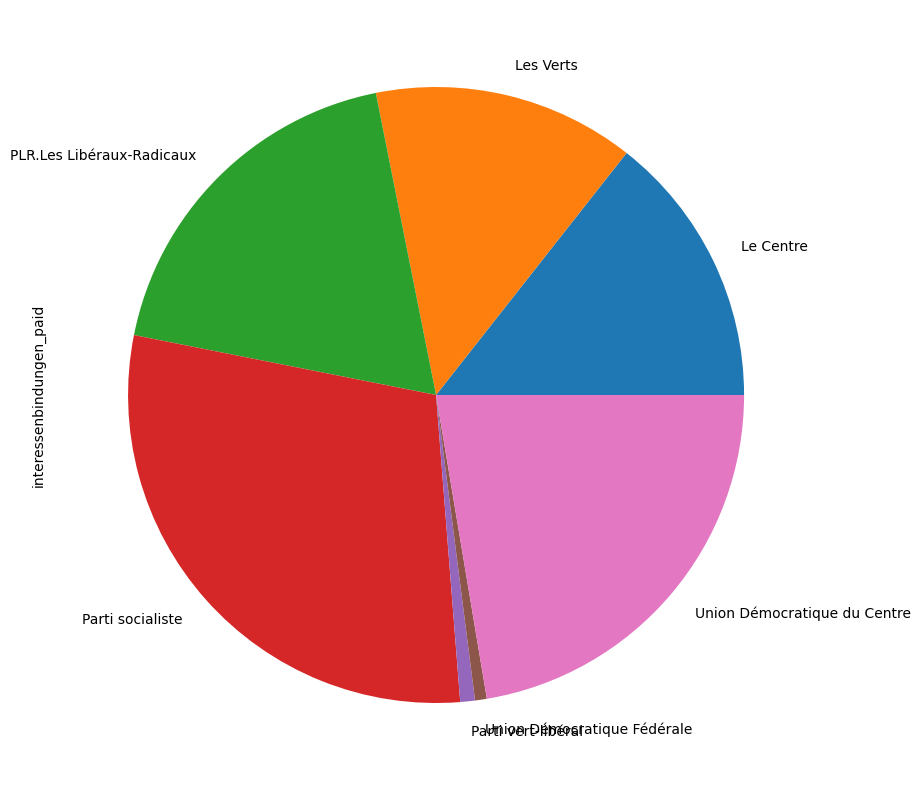

In [14]:
df.groupby('partei_name_fr').sum()['interessenbindungen_paid'].plot.pie(y = 'mean', figsize=(10,10))


<Axes: ylabel='interessenbindungen_unpaid'>

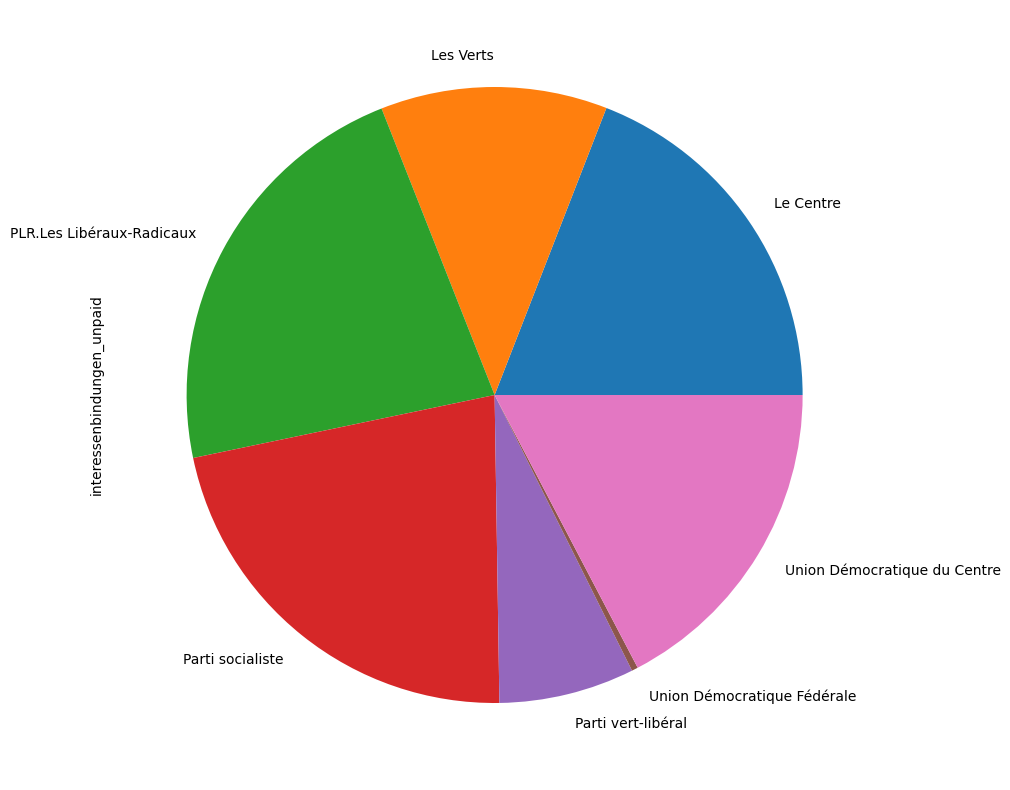

In [15]:
df.groupby('partei_name_fr').sum()['interessenbindungen_unpaid'].plot.pie(y = 'mean', figsize=(10,10))

In [16]:
df.groupby('partei_name_fr').sum()['interessenbindungen_paid']/(df.groupby('partei_name_fr').sum()['interessenbindungen_unpaid']+df.groupby('partei_name_fr').sum()['interessenbindungen_paid'])

partei_name_fr
Le Centre                       0.349946
Les Verts                       0.452174
PLR.Les Libéraux-Radicaux       0.375220
Parti socialiste                0.488457
Parti vert-libéral              0.071869
Union Démocratique Fédérale     0.571429
Union Démocratique du Centre    0.479905
dtype: float64

In [46]:
df.loc[0, 'interessenbindungen'][0]['organisation']['name']

'Komitee für ein selbständiges Baselbiet'

In [81]:
organisation_id = []
organisation_dict = {}
error_cnt = 0
for row in df.index:
    for el1 in df.loc[row, 'interessenbindungen']:
        try:
            print(f"{el1['organisation']['id']} - {el1['organisation']['name']}")
            organisation_dict[el1['organisation']['id']] = el1['organisation']['name']
            organisation_id.append(el1['organisation']['id'])
        except:
            print('error')
            error_cnt +=1
print(f"got {error_cnt} errors")
counter = Counter(organisation_id)
for key, value in counter.most_common(50):
    print(f'Orga {organisation_dict[key]} has {value} parlementary members')

432 - Komitee für ein selbständiges Baselbiet
433 - SPEDLOGSWISS Verband schweizerischer Speditions- und Logistikunternehmen; Spedlogswiss Association Suisse des transitaires et des entreprises de logistique; Spedlogwiss Associazione Svizzera delle imprese di spedizione e logistica
435 - Schweizerischer Verband der Bürgergemeinden und Korporationen; Fédération Suisse des Bourgeouisies et Corporations; Federazione Svizzera dei Patriziati
875 - Vorsorgeforum
923 - IG Biomedizinische Forschung und Innovation
1108 - Lötschberg Komitee
1344 - Schweizer Paraplegiker-Stiftung; Fondation suisse pour paraplégiques; Fondazione svizzera per paraplegici
307 - Politcom, Agentur für politische Kommunikation und Public Affairs, Thomas de Courten
32 - Autobus AG Liestal
5842 - Autobus AG Liestal Öffentlicher Verkehr
343 - Intergenerika
52 - Raiffeisenbank Liestal-Oberbaselbiet Genossenschaft
51 - EBL (Genossenschaft Elektra Baselland)
5159 - Stiftung Schweizerische Wildtierwarte
459 - Inlandbanken; Ba

In [82]:
counter = Counter(organisation_id)
for key, value in counter.most_common(50):
    print(f'Orga {organisation_dict[key]} has {value} parlementary members')

Orga Sport; Sport has 98 parlementary members
Orga Wohn- und Grundeigentum; Propriété immobilière et foncière; Proprietà immobiliare e fondiaria has 86 parlementary members
Orga Bildung, Forschung und Innovation; Formation, recherche et innovation; Formazione, la ricerca e l'innovazione has 70 parlementary members
Orga Landwirtschaftlicher Klub der Bundesversammlung; Club agricole de l'Assemblée fédérale has 64 parlementary members
Orga Bundeshaus-Band; Bundeshaus-Band has 56 parlementary members
Orga Behindertenfragen; Pour les questions relatives aux personnes handicapées; Persone con disabilità has 55 parlementary members
Orga Biodiversität und Artenschutz; Biodiversité et gestion des espèces has 55 parlementary members
Orga lingua e cultura rumantscha; lingua e cultura rumantscha; lingua e cultura rumantscha has 54 parlementary members
Orga Tourismus PGT; Tourisme GPT has 54 parlementary members
Orga Rotes Kreuz; Croix-Rouge; Croce Rossa has 53 parlementary members
Orga Auslandschw

Paid positions

In [85]:
organisation_id = []
organisation_dict = {}
error_cnt = 0
for row in df.index:
    for el1 in df.loc[row, 'interessenbindungen']:
        paid = False
        try:
            for el2 in el1['verguetungen']:
                if (el2['beschreibung']!= None):# and (el2['beschreibung'] not in unpaid_positions) and (el2['beschreibung'] not in paid_positions):
                    if el2['beschreibung'] in paid_positions:
                        paid = True
            if paid:
                organisation_dict[el1['organisation']['id']] = el1['organisation']['name']
                organisation_id.append(el1['organisation']['id'])
        except:
            print('error')
            error_cnt +=1
print(f"got {error_cnt} errors")
counter = Counter(organisation_id)
for key, value in counter.most_common(50):
    print(f'Orga {organisation_dict[key]} has {value} parlementary members')

got 0 errors
Orga Pro Natura - Schweizerischer Bund für Naturschutz has 14 parlementary members
Orga Schweizerischer Verband des Personals öffentlicher Dienste (V.P.O.D.); Syndicat suisse des services publics; Sindacato svizzero dei servizi pubblici has 14 parlementary members
Orga WWF Schweiz; WWF Suisse; WWF Svizzera has 12 parlementary members
Orga Greenpeace Schweiz has 11 parlementary members
Orga Die Mitte Frauen Schweiz; Le Centre Femmes Suisse; Allianza dal Center svizzero delle donne has 10 parlementary members
Orga VCS Verkehrs-Club der Schweiz; ATE Association transports et environnement; ATA Associazione traffico e ambiente has 10 parlementary members
Orga Amnesty International - Schweizer Sektion has 9 parlementary members
Orga Gewerkschaft Unia; Syndicat Unia; Sindacato Unia has 8 parlementary members
Orga Schweizerische Rettungsflugwacht (Rega) has 8 parlementary members
Orga Public Eye; Public Eye; Dichiarazione di Berne has 7 parlementary members
Orga Schweizerischer A